In [11]:
import time
import sys
import os
import wget
import glob

from IPython.display import Image, display
from turbo_seti.find_doppler.find_doppler import FindDoppler
from blimpy import Waterfall
from pathlib import Path

In [3]:
def bugReport(err):
    print(err)
    sys.exit(err)

In [45]:
%rm ./results/*
%rm ./*.txt
%rm ./data/*.[dlpt]??

rm: cannot remove './results/*': No such file or directory
rm: cannot remove './*.txt': No such file or directory


In [4]:
fdop = FindDoppler(datafile='./blc33_guppi_60067_75323_PSR_B0355+54_0012.rawspec.0002.h5')
fdop.search()


turbo_seti version 2.3.2
blimpy version 2.1.4
h5py version 3.8.0
hdf5plugin version 4.1.2
HDF5 library version 1.12.2


data_handler    INFO     From nfpc=1024, n_fine_nchans=65536 and n_coarse_chan=64
HDF5 header info: {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 8438.96484375, 'foff': -0.00286102294921875, 'ibeam': 1, 'machine_id': 20, 'nbeams': 1, 'nbits': 32, 'nchans': 65536, 'nfpc': 1024, 'nifs': 1, 'rawdatafile': 'guppi_60067_75323_PSR_B0355+54_0012.0000.raw', 'source_name': 'PSR_B0355+54', 'src_dej': <Angle 54.2228 deg>, 'src_raj': <Angle 3.98176 hourangle>, 'telescope_id': 6, 'tsamp': 1.073741823999999, 'tstart': 60067.87179398148, 'za_start': 0.0}

Starting ET search with parameters: datafile=./blc33_guppi_60067_75323_PSR_B0355+54_0012.rawspec.0002.h5, max_drift=10.0, min_drift=1e-05, snr=25.0, out_dir=./, coarse_chans=None, flagging=False, n_coarse_chan=64, kernels=None, gpu_id=0, gpu_backend=False, blan

In [35]:
DATADIR = "./data"
H5PATH = DATADIR + "/" + "blc33_guppi_60067_75323_PSR_B0355+54_0012.rawspec.0002.h5"
#OUT_DIR = "./results"

In [ ]:
print("\nUsing HDF5 file: {}\nHeader and data shape:".format(H5PATH))
# -- Get a report of header and data shape
wf = Waterfall(H5PATH)
wf.info()
# -- Instantiate FindDoppler.
print("\nInstantiating the FindDoppler object.")
doppler = FindDoppler(datafile=H5PATH, max_drift=4, snr=25, out_dir=DATADIR)
# -- Search for hits and report elapsed time.
print("\nBegin doppler search.  Please wait ...")
t1 = time.time()
doppler.search()
elapsed_time = time.time() - t1
print("\nFindDoppler.search() elapsed time = {} seconds".format(elapsed_time))

In [48]:
demoSignal = DATADIR + '/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5'
console = 'turboSETI ' + demoSignal + ' -M 4 -s 10 -o ' + DATADIR
os.system(console)


turbo_seti version 2.3.2
blimpy version 2.1.4
h5py version 3.8.0
hdf5plugin version 4.1.2
HDF5 library version 1.12.2


data_handler    INFO     From blimpy, n_coarse_chan=1
HDF5 header info: {'DIMENSION_LABELS': array(['time', 'feed_id', 'frequency'], dtype=object), 'az_start': 0.0, 'data_type': 1, 'fch1': 8421.38671875, 'foff': -2.7939677238464355e-06, 'machine_id': 20, 'nbits': 32, 'nchans': 1048576, 'nifs': 1, 'source_name': 'VOYAGER-1', 'src_dej': <Angle 12.40378167 deg>, 'src_raj': <Angle 17.21124472 hourangle>, 'telescope_id': 6, 'tsamp': 18.253611007999982, 'tstart': 59046.92634259259, 'za_start': 0.0}

Starting ET search with parameters: datafile=./data/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5, max_drift=4.0, min_drift=1e-05, snr=10.0, out_dir=./data, coarse_chans=, flagging=False, n_coarse_chan=1, kernels=None, gpu_id=0, gpu_backend=False, blank_dc=True, precision=1, append_output=False, log_level_int=20, obs_info={'pulsar': 0, 'pulsar_found': 0, '

0

In [ ]:
dirFiles = os.listdir(DATADIR)
dirFiles.sort()

for file in sorted(dirFiles):
    if(file.endswith('.h5')):
        # Execute turboSETI in the terminal
        console = 'turboSETI ' + DATADIR + "/" + file + ' -M 4 -s 10 -o ' + DATADIR
        os.system(console)

In [51]:
#console = "plotSETI -d " + OUT_DIR + " -h5_dir " + DATADIR + " -o " + OUT_DIR + " -f 3 "  
console = "plotSETI -f 3 -o " + DATADIR + " " + DATADIR
os.system(console)
print("\nAll PNG files have been generated.")

plotSETI: Directory of h5 files: /home/science/klt/data/
plotSETI: Directory of dat files: /home/science/klt/data/
plotSETI: Found 1 h5 files.
plotSETI: Found 1 dat files.

===========   BEGINNING FIND_EVENT PIPELINE   ===========

Assuming the first observation is an ON
find_event_pipeline INFO     file=single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat, tstart=59046.92634259259, source_name=VOYAGER-1, fch1=8421.38671875, foff=-2.7939677238464355e-06, nchans=1048576
There are 1 total files in the filelist /home/science/klt/data/list_dat_files.txt
Therefore, looking for events in 1 on-off set(s)
Present in all ON sources with RFI rejection from the OFF sources
A CSV file will be saved
=== First DAT file in set:  single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat ===
find_events: SNR_cut = None
find_events: min_drift_rate = None
find_events: max_drift_rate = None
find_events: Loading data...
find_events: Loaded 3 hits from /home/science/klt/data/singl

9


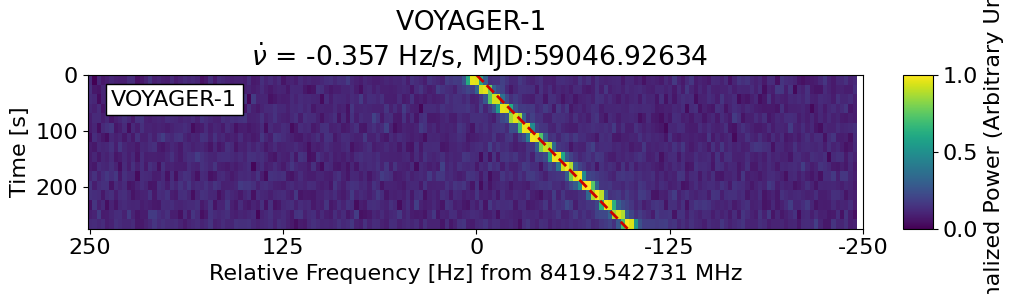

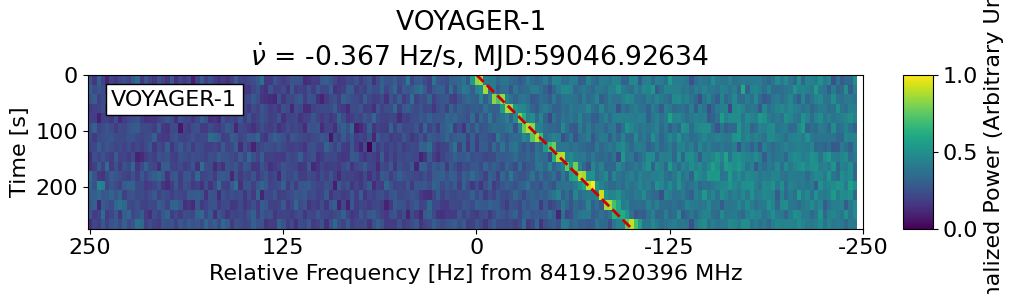

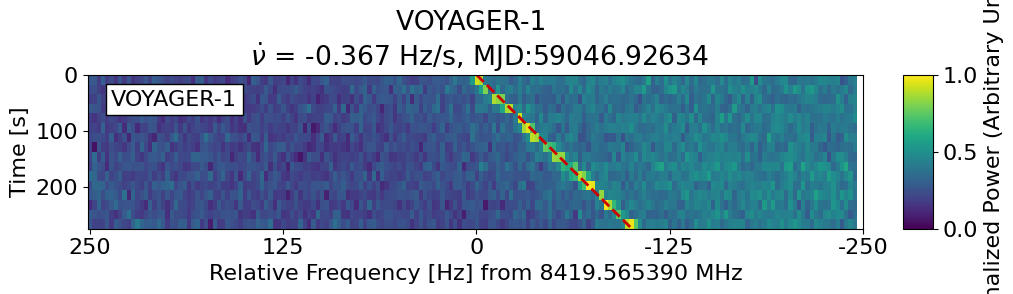

In [57]:
dirFiles = os.listdir(DATADIR)
dirFiles.sort()
print(len(dirFiles))
for pngfile in sorted(dirFiles):
    if(pngfile.endswith('.png')):
        display(Image(filename=DATADIR + "/" + pngfile))